# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [323]:
#Type your code here
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [324]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [325]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [326]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [327]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

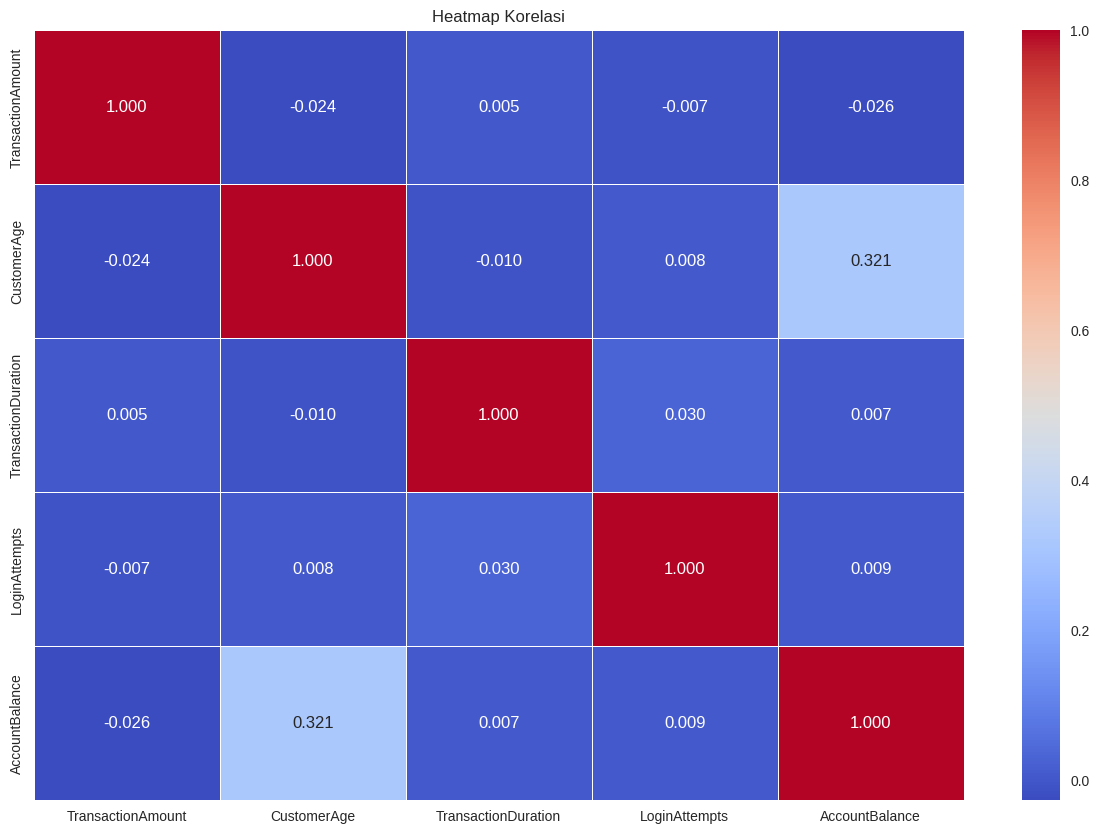

In [328]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

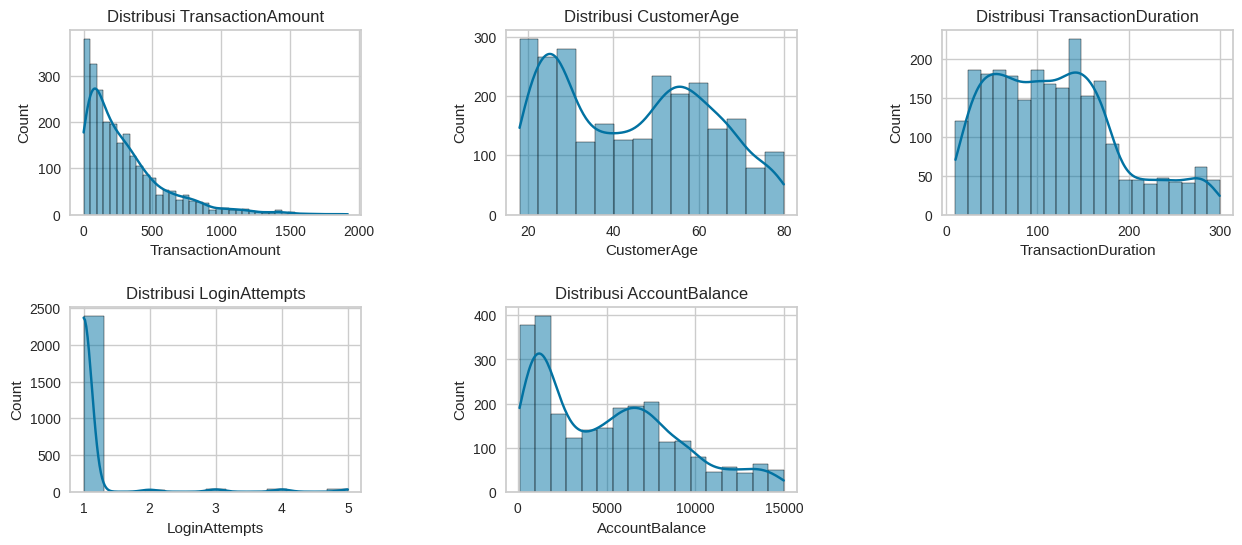

In [329]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(1 , figsize = (15 , 6))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(2 , 3 , i)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[column] , kde=True)
    plt.title('Distribusi {}'.format(column))
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

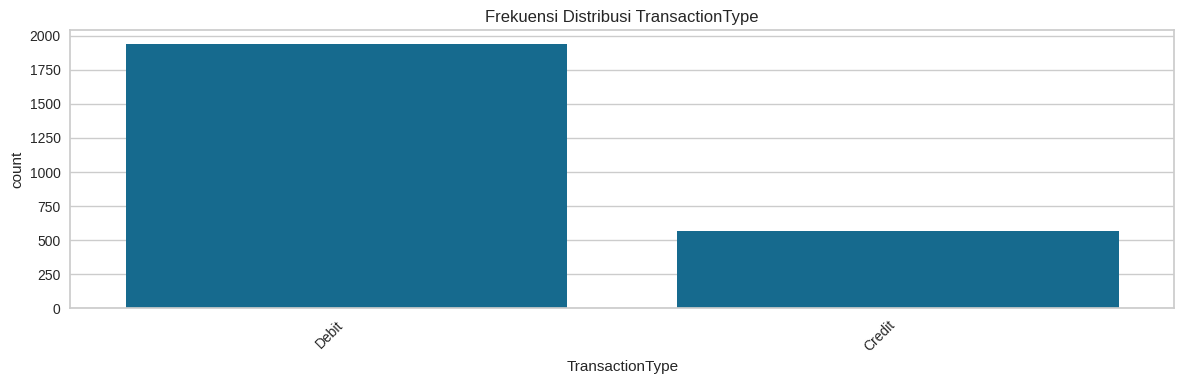

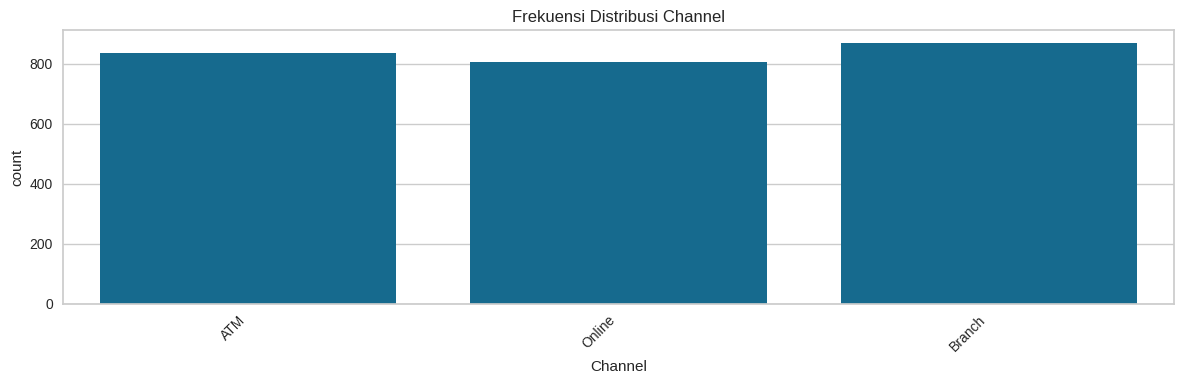

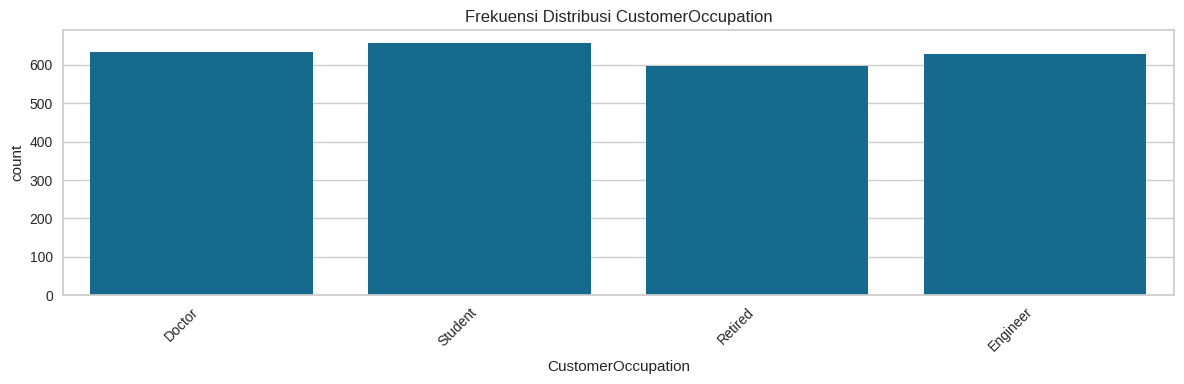

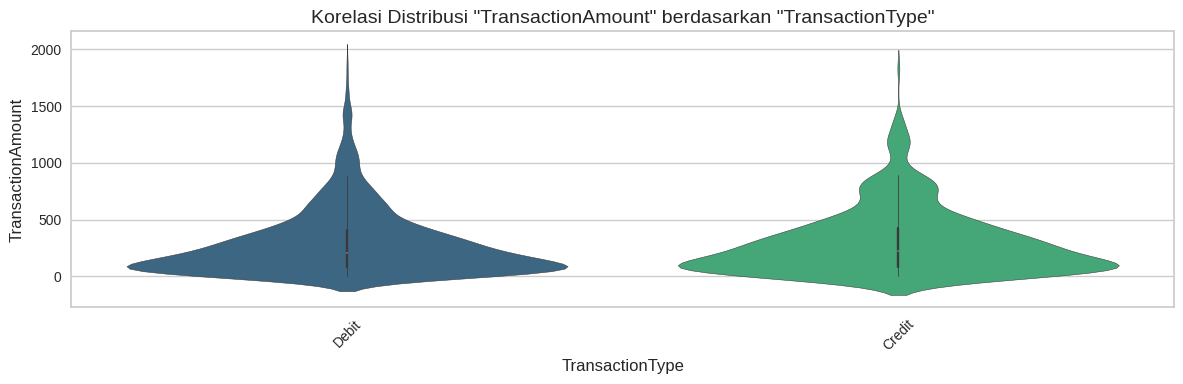

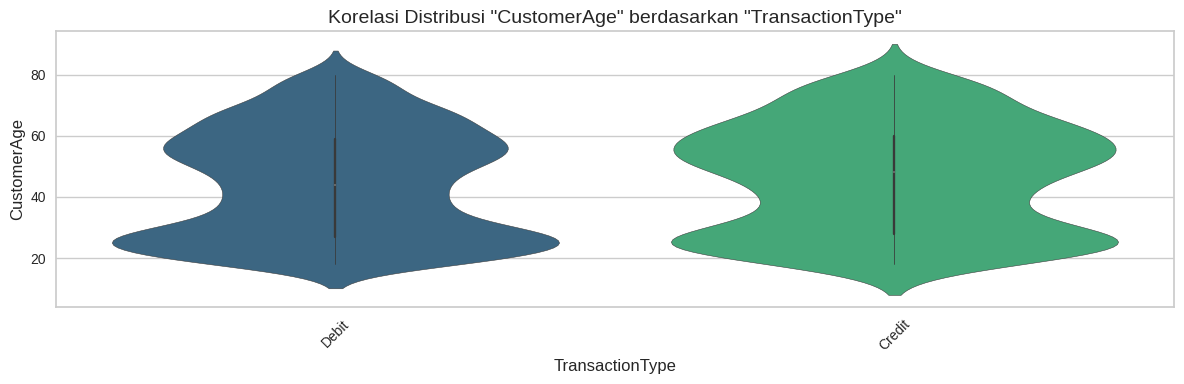

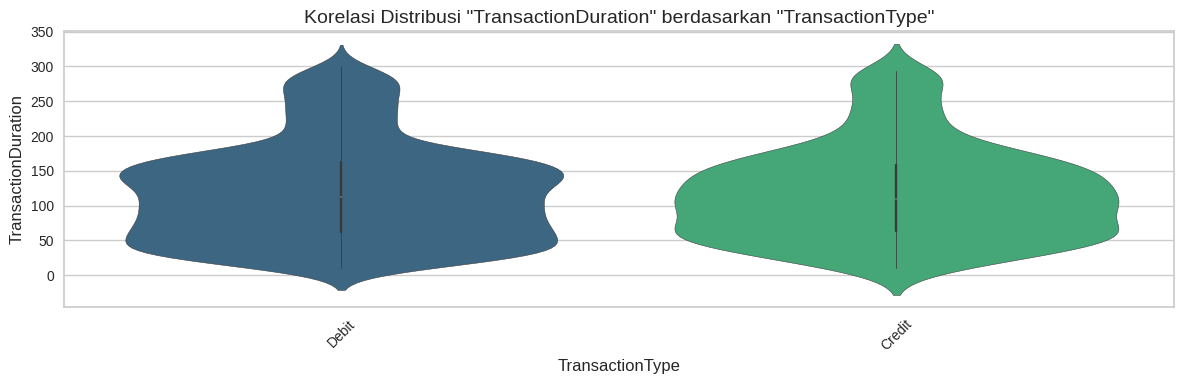

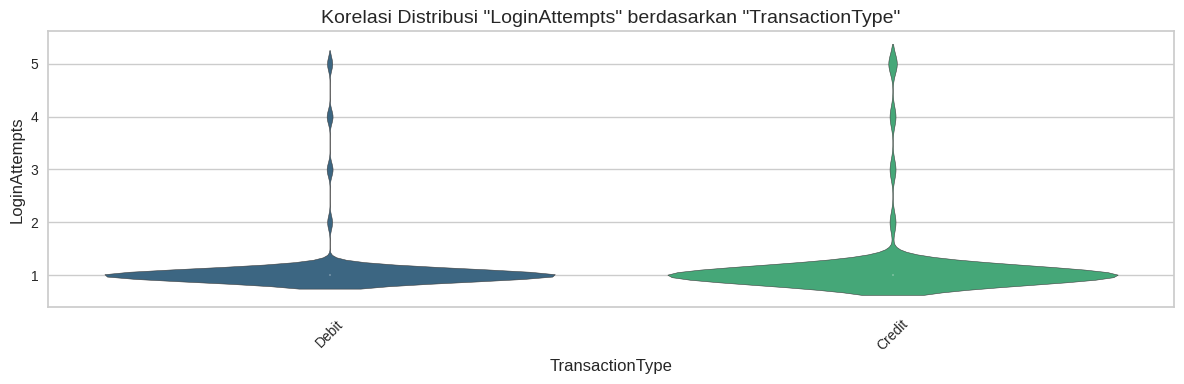

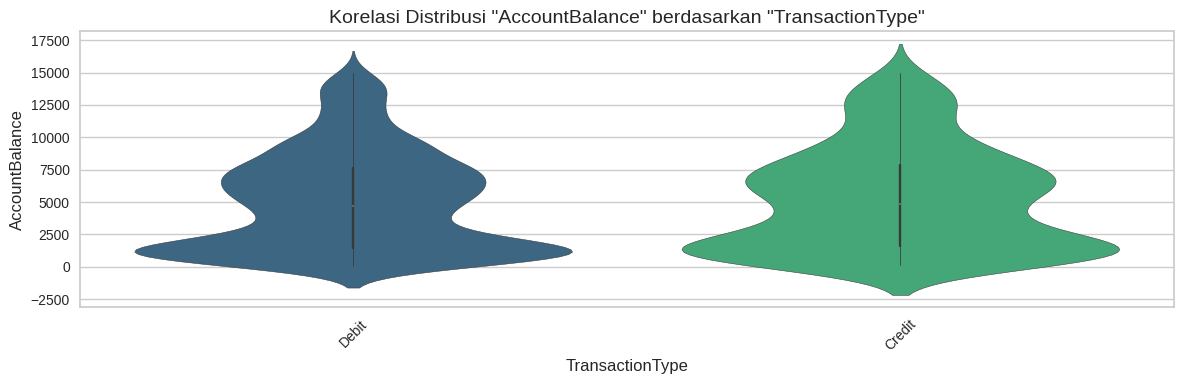

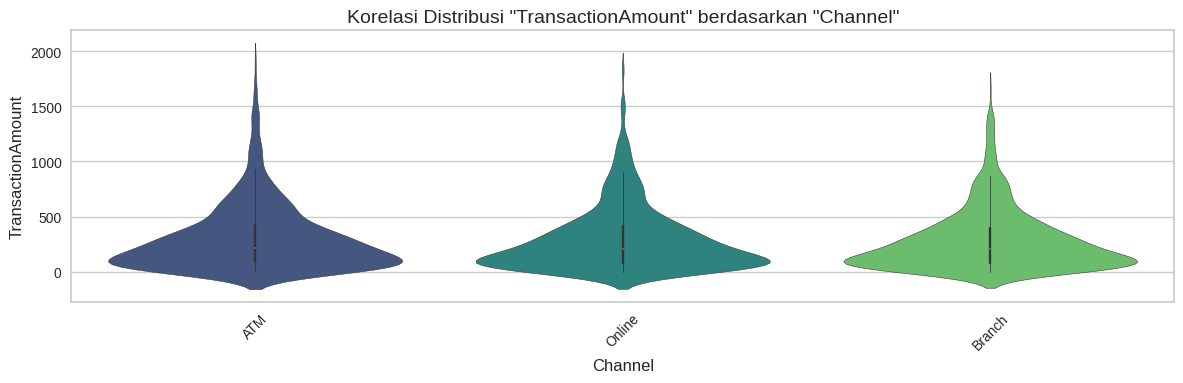

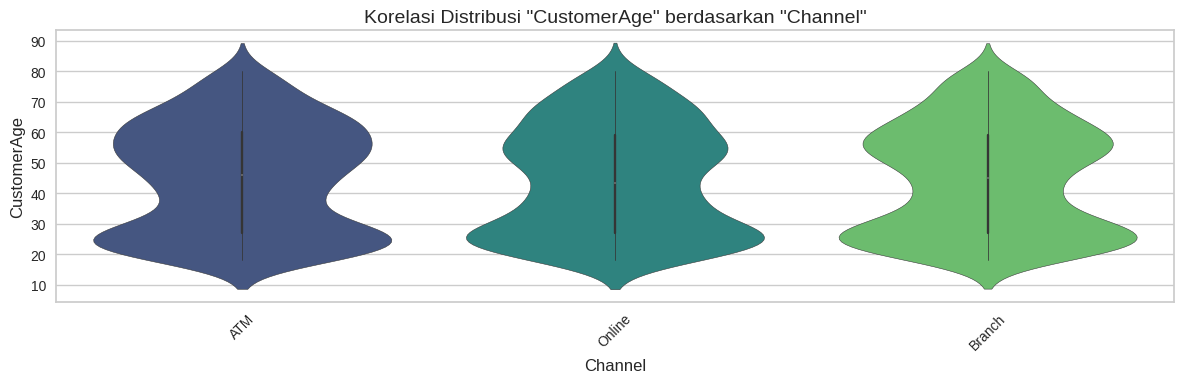

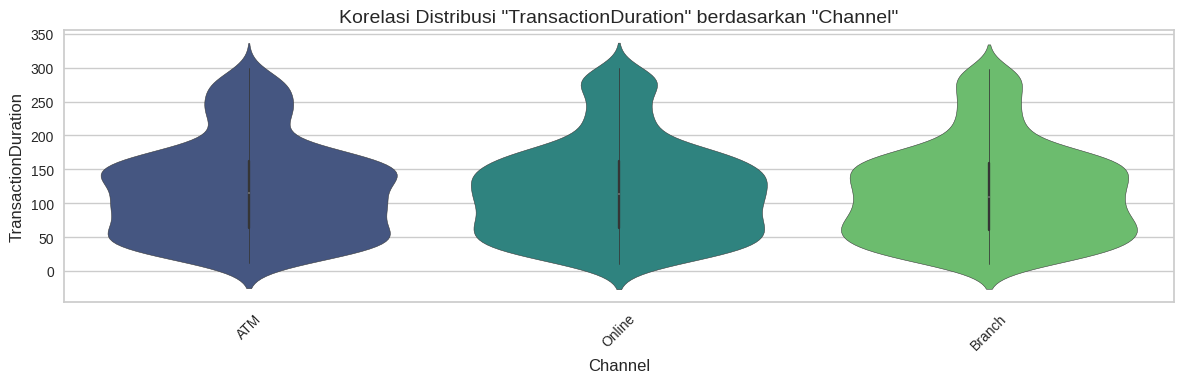

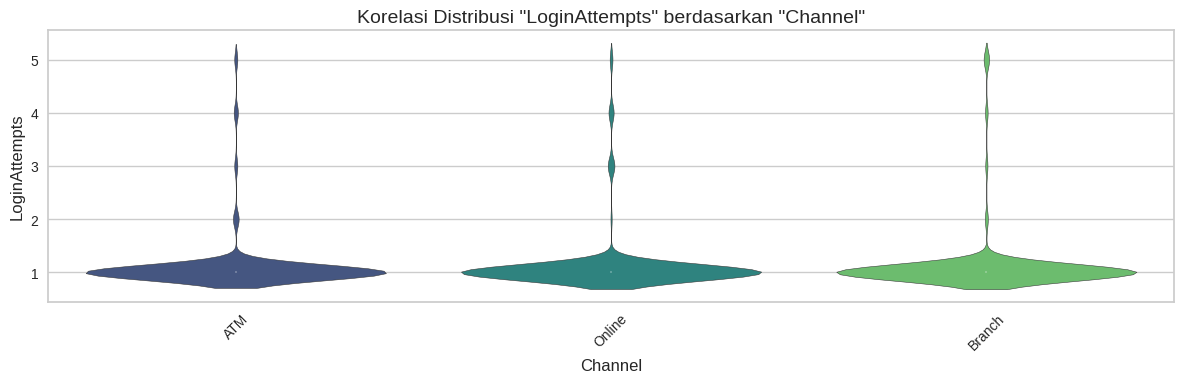

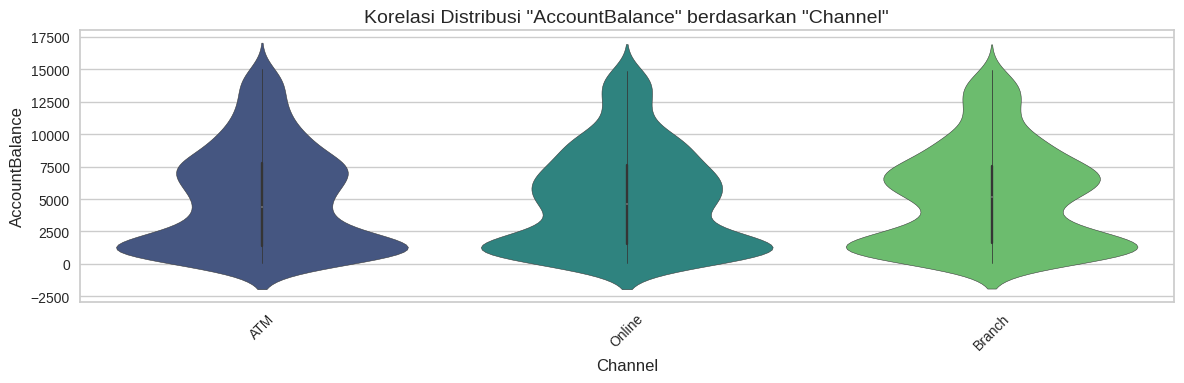

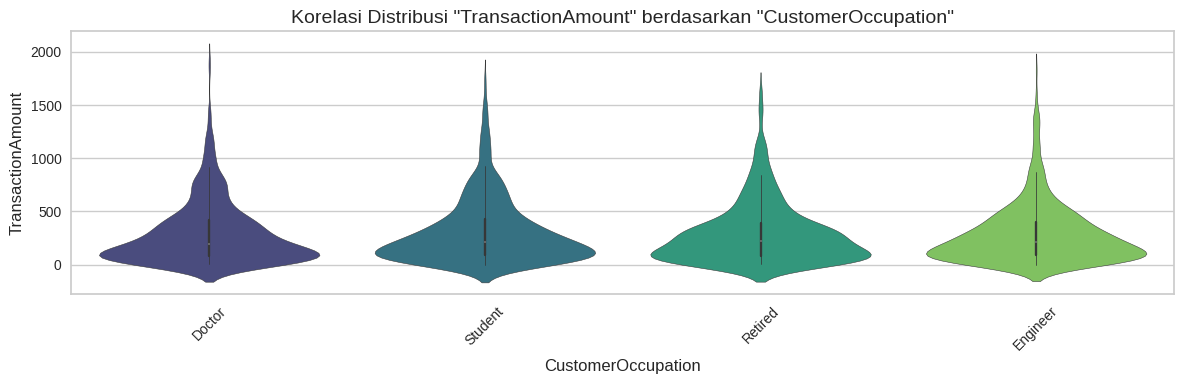

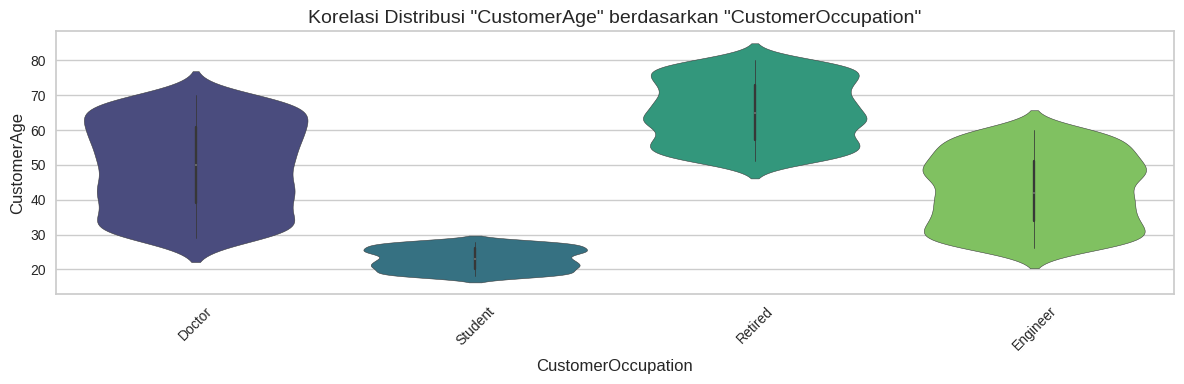

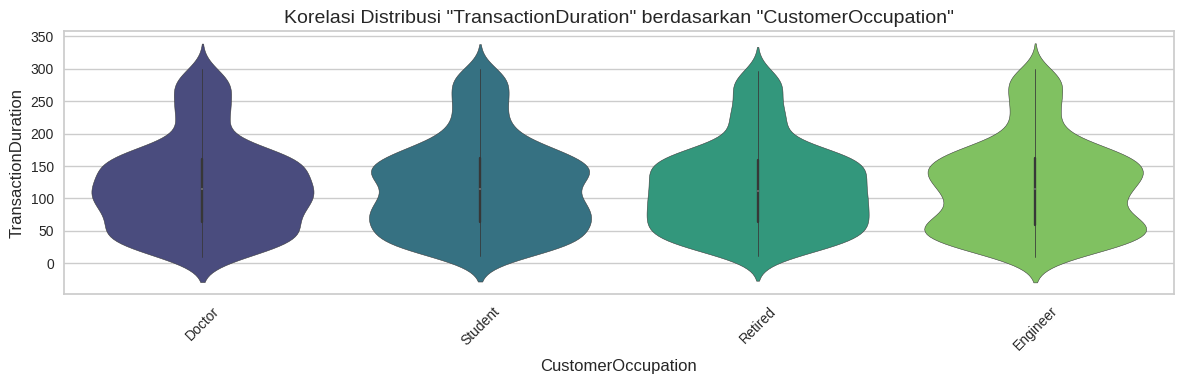

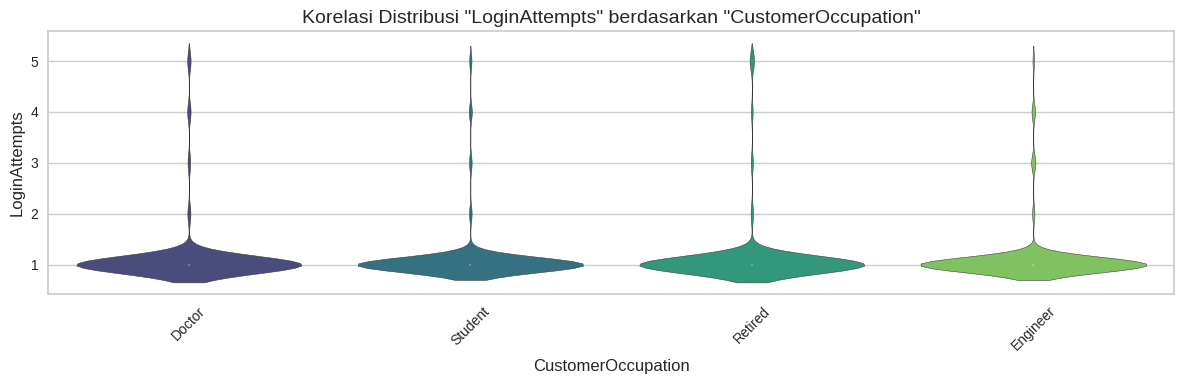

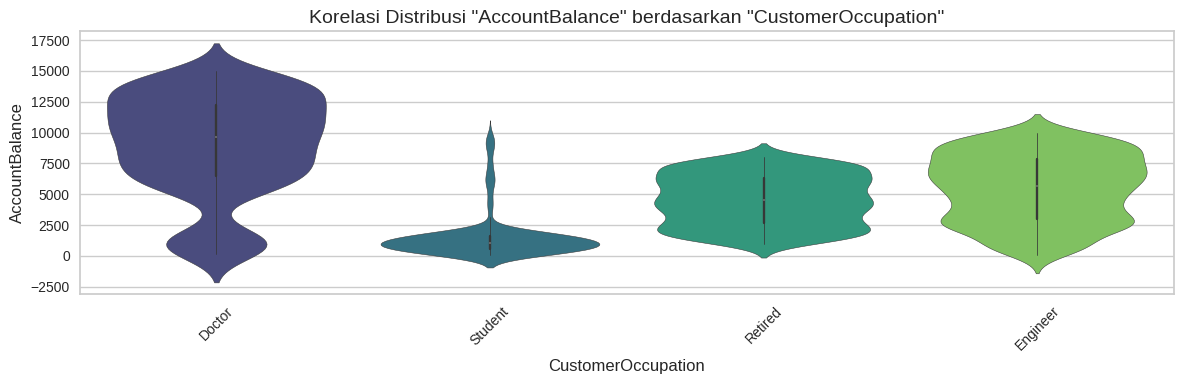

In [330]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
selected_columns = df[['TransactionType', 'Channel', 'CustomerOccupation']].columns

for column in selected_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Frekuensi Distribusi {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for cat_col in selected_columns:
    for num_col in num_features:

        plt.figure(figsize=(12, 4))

        sns.violinplot(x=cat_col, y=num_col, data=df, palette='viridis')

        plt.title(f'Korelasi Distribusi "{num_col}" berdasarkan "{cat_col}"', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [331]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [332]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [333]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[num_columns] = scaler.fit_transform(df[num_columns])

df[num_columns].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [334]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [335]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoders = {}
categorical_cols = []

# Cari kolom object/string yang bukan date
for col in df.select_dtypes(include=['object', 'string']).columns:
    try:
        pd.to_datetime(df[col], errors='raise')
        continue
    except (ValueError, TypeError):
        categorical_cols.append(col)

# Encode kolom kategorikal
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col].replace(['', ' ', 'nan', 'None', 'NaN'], np.nan, inplace=True)

    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

    # Encode
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [336]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [337]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# NaN pada kolom numerik diisi dengan mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# NaN pada kolom kategorikal dengan modus
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [338]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

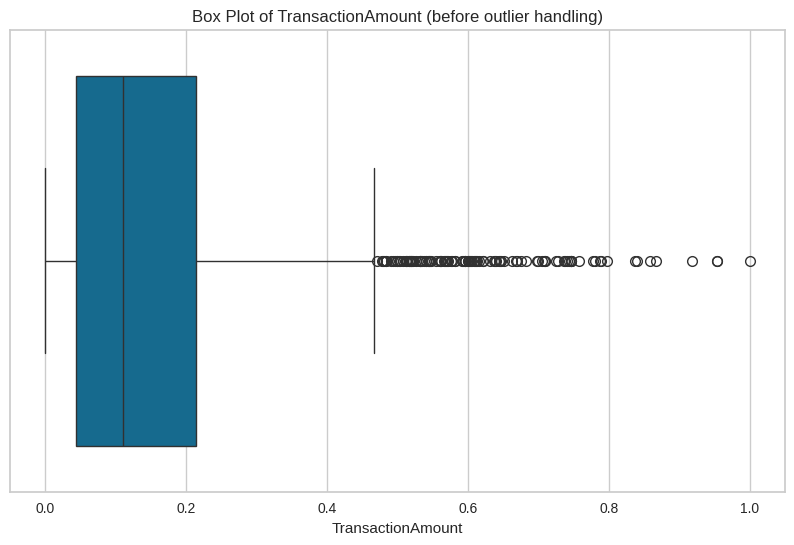

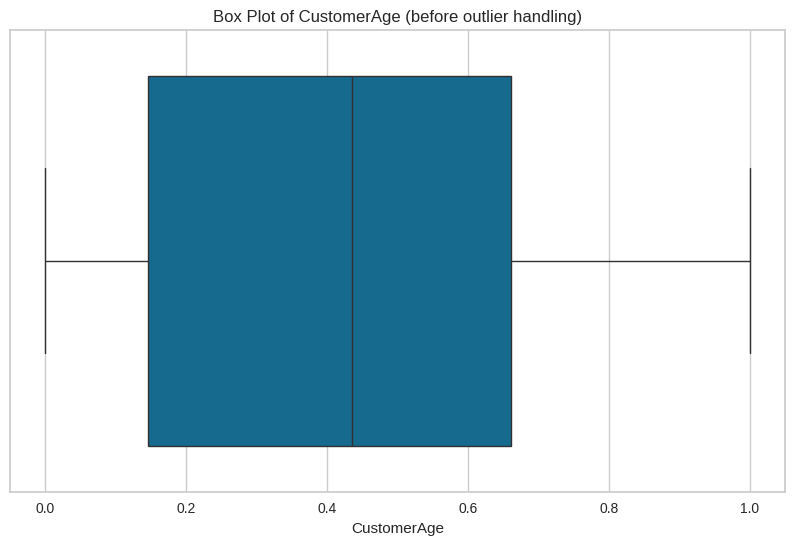

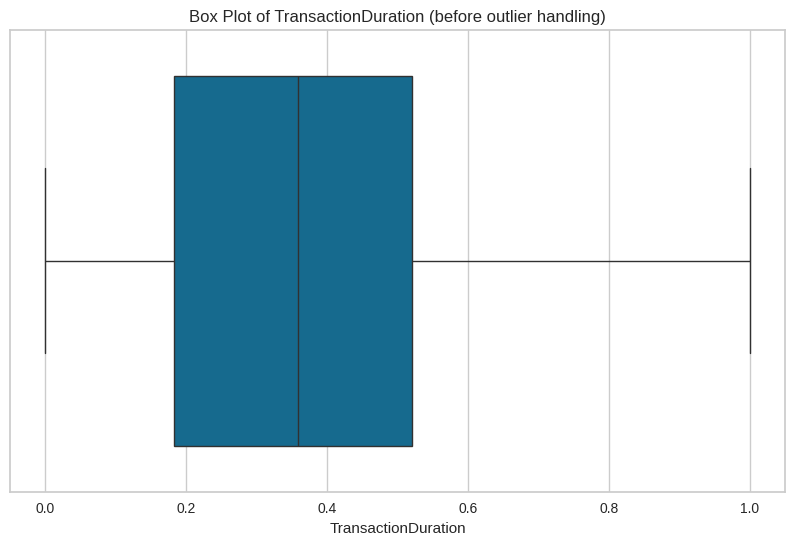

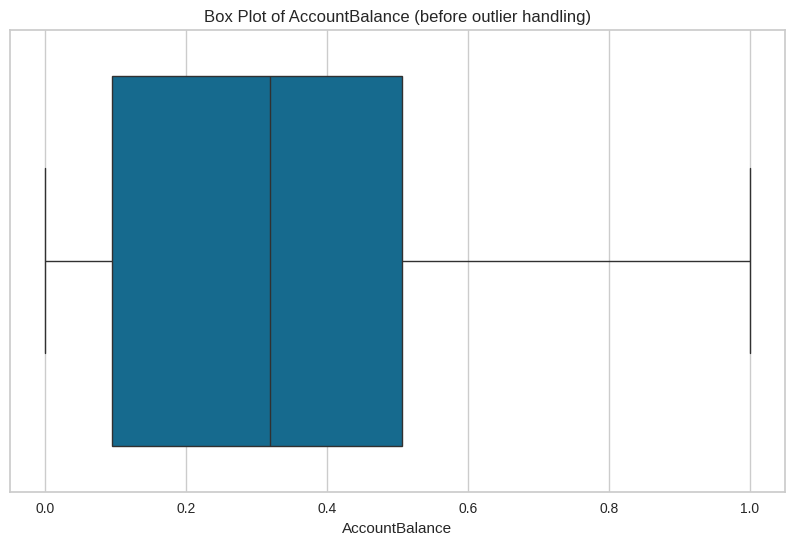

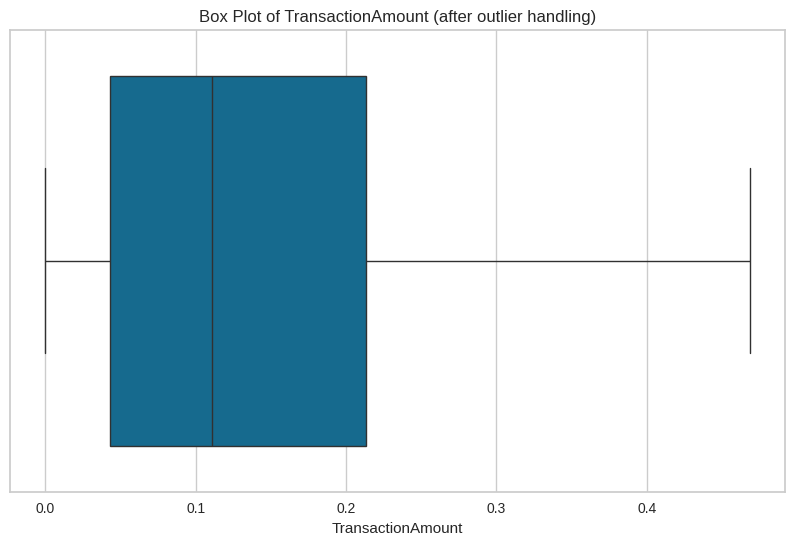

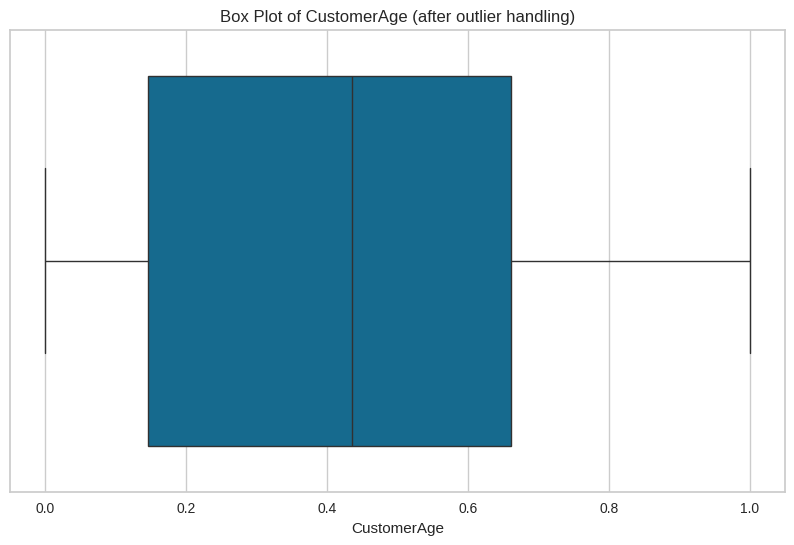

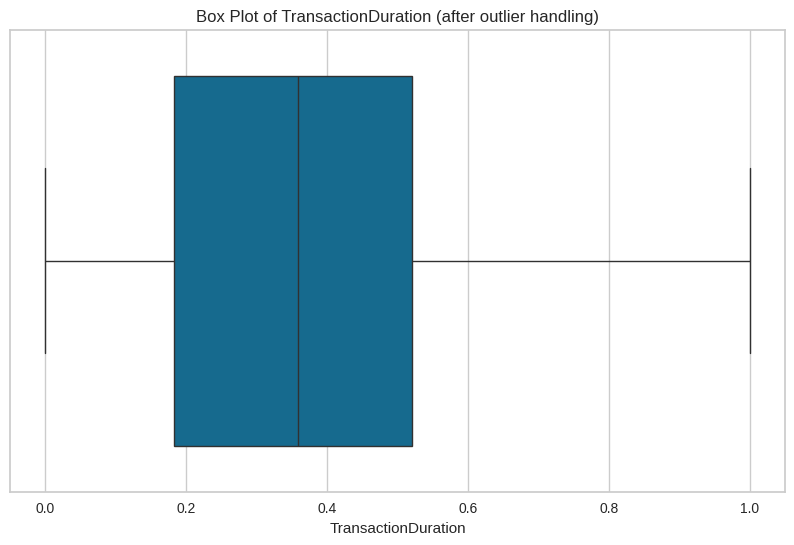

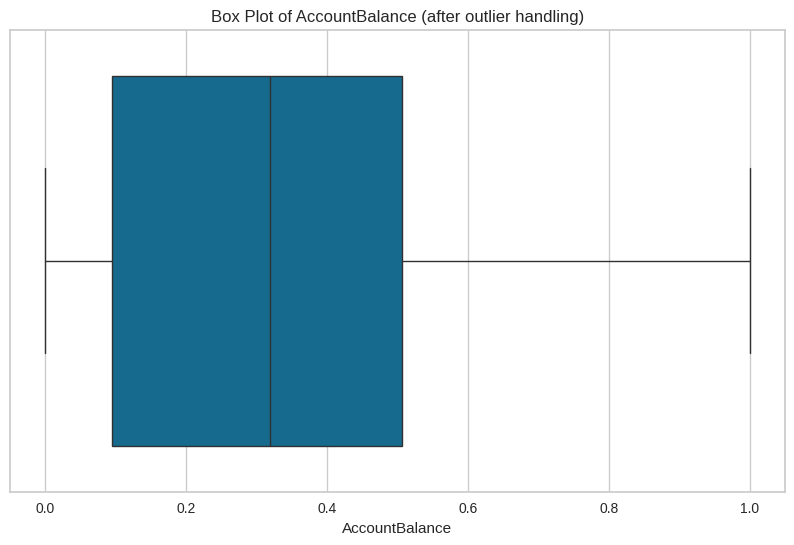

In [339]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for feature in num_features:
    if feature == 'LoginAttempts':
        continue
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (before outlier handling)')
    plt.show()

Q1 = df[num_features.columns].quantile(0.25)
Q3 = df[num_features.columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Nilai outlier diubah menjadi nilai pada batas terdekat dari nilai outlier
df['TransactionAmount'] = df['TransactionAmount'].apply(
    lambda x: lower_bound['TransactionAmount'] if x < lower_bound['TransactionAmount']
            else upper_bound['TransactionAmount'] if x > upper_bound['TransactionAmount']
            else x
)

for feature in num_features:
    if feature == 'LoginAttempts':
        continue
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (after outlier handling)')
    plt.show()

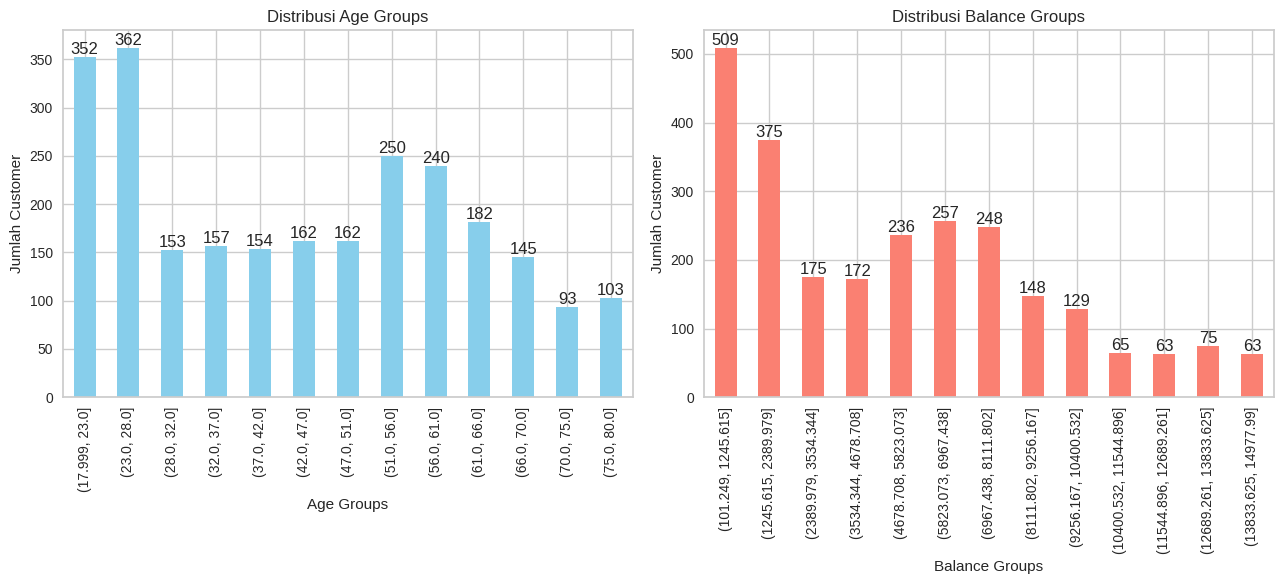

=== Mapping AgeGroup ===
- (17.999, 23.0]: 0
- (23.0, 28.0]: 1
- (28.0, 32.0]: 2
- (32.0, 37.0]: 3
- (37.0, 42.0]: 4
- (42.0, 47.0]: 5
- (47.0, 51.0]: 6
- (51.0, 56.0]: 7
- (56.0, 61.0]: 8
- (61.0, 66.0]: 9
- (66.0, 70.0]: 10
- (70.0, 75.0]: 11
- (75.0, 80.0]: 12

=== Mapping BalanceGroup ===
- (101.249, 1245.615]: 0
- (1245.615, 2389.979]: 1
- (2389.979, 3534.344]: 2
- (3534.344, 4678.708]: 3
- (4678.708, 5823.073]: 4
- (5823.073, 6967.438]: 5
- (6967.438, 8111.802]: 6
- (8111.802, 9256.167]: 7
- (9256.167, 10400.532]: 8
- (10400.532, 11544.896]: 9
- (11544.896, 12689.261]: 10
- (12689.261, 13833.625]: 11
- (13833.625, 14977.99]: 12


,AgeGroupCat,AgeGroupEncoded,BalanceGroupCat,BalanceGroupEncoded
0,"(66.0, 70.0]",10,"(4678.708, 5823.073]",4
1,"(66.0, 70.0]",10,"(12689.261, 13833.625]",11
2,"(17.999, 23.0]",0,"(101.249, 1245.615]",0
3,"(23.0, 28.0]",1,"(8111.802, 9256.167]",7
4,"(42.0, 47.0]",5,"(6967.438, 8111.802]",6


In [340]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Inverse transform manual pakai range asli agar visualisasi dapat terlihat jelas rentangnya
df['CustomerAge_inverse'] = (df['CustomerAge'] * (80 - 18) + 18).round().astype(int)
df['AccountBalance_inverse'] = (df['AccountBalance'] * (14977.99 - 101.25) + 101.25)

# Hitung jumlah bin dengan aturan "sturges"
age_bins = np.histogram_bin_edges(df['CustomerAge_inverse'], bins="sturges").round().astype(int)
balance_bins = np.histogram_bin_edges(df['AccountBalance_inverse'], bins="sturges")

df['AgeGroupCat'] = pd.cut(df['CustomerAge_inverse'], bins=age_bins, include_lowest=True)
df['BalanceGroupCat'] = pd.cut(df['AccountBalance_inverse'], bins=balance_bins, include_lowest=True)

# Menggunakan LabelEncoder
le_age = LabelEncoder()
df['AgeGroupEncoded'] = le_age.fit_transform(df['AgeGroupCat'])
le_balance = LabelEncoder()
df['BalanceGroupEncoded'] = le_balance.fit_transform(df['BalanceGroupCat'])

df.drop(columns=['CustomerAge_inverse', 'AccountBalance_inverse'], inplace=True)

# Visualisasi hasil binning tiap fitur yang udah diencode
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

age_counts = df['AgeGroupCat'].value_counts().sort_index()
age_counts.plot(kind='bar', ax=axes[0], color="skyblue")
axes[0].set_title("Distribusi Age Groups")
axes[0].set_xlabel("Age Groups")
axes[0].set_ylabel("Jumlah Customer")
for i, val in enumerate(age_counts.values):
    axes[0].text(i, val, int(val), ha='center', va='bottom')

balance_counts = df['BalanceGroupCat'].value_counts().sort_index()
balance_counts.plot(kind='bar', ax=axes[1], color="salmon")
axes[1].set_title("Distribusi Balance Groups")
axes[1].set_xlabel("Balance Groups")
axes[1].set_ylabel("Jumlah Customer")
for i, val in enumerate(balance_counts.values):
    axes[1].text(i, val, int(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("=== Mapping AgeGroup ===")
age_mapping = dict(zip(le_age.classes_, le_age.transform(le_age.classes_)))
for label, value in age_mapping.items():
    print(f"- {label}: {value}")

print("\n=== Mapping BalanceGroup ===")
balance_mapping = dict(zip(le_balance.classes_, le_balance.transform(le_balance.classes_)))
for label, value in balance_mapping.items():
    print(f"- {label}: {value}")

df[['AgeGroupCat','AgeGroupEncoded','BalanceGroupCat','BalanceGroupEncoded']].head()

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [341]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroupEncoded,BalanceGroupEncoded
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.148066,0.776143,20.928429,0.989264,0.429579,1.521272,0.377697,0.030671,0.337132,4.991650,3.905368
std,0.130024,0.416910,12.194902,0.804401,0.286277,1.134477,0.240111,0.148619,0.260618,3.731482,3.373671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043180,1.000000,11.000000,0.000000,0.145161,0.500000,0.182759,0.000000,0.095324,1.000000,1.000000
50%,0.111087,1.000000,21.000000,1.000000,0.435484,2.000000,0.358621,0.000000,0.318555,5.000000,4.000000
75%,0.213326,1.000000,31.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506842,8.000000,6.000000
max,0.468545,1.000000,42.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,12.000000,12.000000


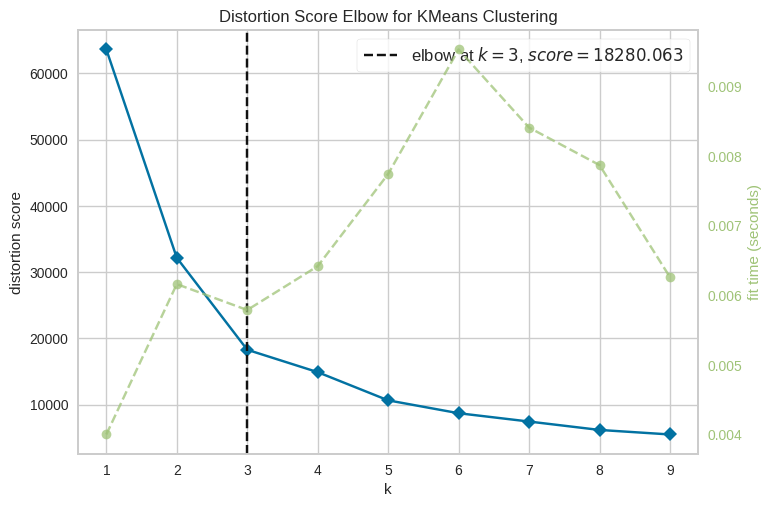

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [342]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df[['AgeGroupEncoded', 'BalanceGroupEncoded']].iloc[: , :].values

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [343]:
# Menggunakan algoritma K-Means Clustering
X = df[['AgeGroupEncoded', 'BalanceGroupEncoded']].values

# Implementasi KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_model = kmeans.fit(X)

kmeans_labels = kmeans.labels_
df['Cluster'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [344]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [345]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(X, kmeans_labels)
print(f"\nSilhouette Score (k={k}): {sil_score:.4f}")


Silhouette Score (k=3): 0.4887


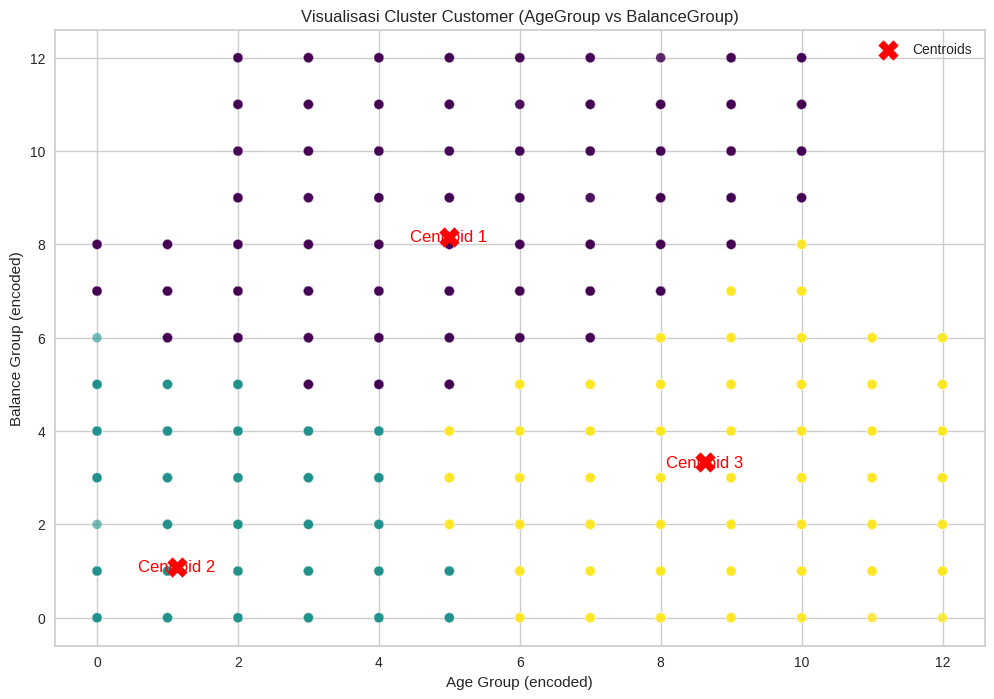

Nilai Centroids:
Centroid 1: AgeGroup = 4.99, BalanceGroup = 8.15
Centroid 2: AgeGroup = 1.13, BalanceGroup = 1.09
Centroid 3: AgeGroup = 8.62, BalanceGroup = 3.33


In [346]:
# Membuat visualisasi hasil clustering
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

# Visualisasi cluster dan centroid tiap cluster
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster Customer (AgeGroup vs BalanceGroup)')
plt.xlabel('Age Group (encoded)')
plt.ylabel('Balance Group (encoded)')
plt.legend()

plt.show()

# Lihat nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: AgeGroup = {centroid[0]:.2f}, BalanceGroup = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [347]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.select_dtypes(include=['int64', 'float64']))

data_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Implementasi KMeans
kmeans_pca  = KMeans(n_clusters=k)
kmeans_pca_final = kmeans_pca.fit(data_final)


Silhouette Score (k=3): 0.4382


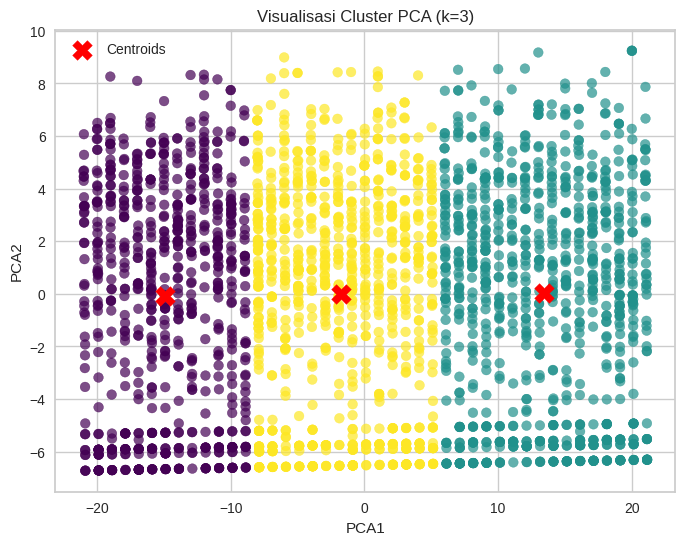

In [348]:
labels_pca = kmeans_pca.labels_
data_final['Cluster'] = labels_pca

# Siloutte score
sil_score = silhouette_score(data_final[['PCA1', 'PCA2']], labels_pca)
print(f"\nSilhouette Score (k={k}): {sil_score:.4f}")

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(data_final['PCA1'], data_final['PCA2'],
            c=labels_pca, cmap='viridis', alpha=0.7)

# Plot centroid
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],
            c='red', marker='X', s=200, label='Centroids')

plt.title(f'Visualisasi Cluster PCA (k={k})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [349]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca_final, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [350]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
def analyze_clusters(X, labels, k, feature_names=None):
    if isinstance(X, np.ndarray):
        if feature_names is None:
            feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
        df = pd.DataFrame(X, columns=feature_names)
    else:
        df = X.copy()

    df['Cluster'] = labels

    print("\n=== Analisis Karakteristik Cluster ===\n")

    for cluster_id in range(k):
        cluster_data = df[df['Cluster'] == cluster_id]
        print(f"Cluster {cluster_id + 1}:")
        for col in feature_names:
            mean_val = cluster_data[col].mean()
            min_val = cluster_data[col].min()
            max_val = cluster_data[col].max()
            median_val = cluster_data[col].median()
            std_val = cluster_data[col].std()
            print(f"  {col}: mean={mean_val:.2f}, min={min_val:.2f}, max={max_val:.2f}, median={median_val:.2f}, std={std_val:.2f}")
        print("-" * 50)

analyze_clusters(X, kmeans_labels, k, feature_names=['AgeGroupEncoded', 'BalanceGroupEncoded'])


=== Analisis Karakteristik Cluster ===

Cluster 1:
  AgeGroupEncoded: mean=4.99, min=0.00, max=10.00, median=5.00, std=2.53
  BalanceGroupEncoded: mean=8.15, min=5.00, max=12.00, median=8.00, std=2.11
--------------------------------------------------
Cluster 2:
  AgeGroupEncoded: mean=1.13, min=0.00, max=5.00, median=1.00, std=1.31
  BalanceGroupEncoded: mean=1.09, min=0.00, max=6.00, median=0.00, std=1.51
--------------------------------------------------
Cluster 3:
  AgeGroupEncoded: mean=8.62, min=5.00, max=12.00, median=8.00, std=1.98
  BalanceGroupEncoded: mean=3.33, min=0.00, max=8.00, median=3.00, std=1.92
--------------------------------------------------


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah Mapan dengan Saldo Tinggi)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> 4.89
  - **Minimal (min) <Fitur>:** <Sebelum inverse> 0.00
  - **Maksimal (max) <Fitur>:** <Sebelum inverse> 10.00 <Setelah inverse>
  - **Analisis:** Nasabah cluster ini berada pada fase dewasa muda hingga paruh baya. Nasabah di cluster ini cenderung sudah mapan, memiliki pendapatan tetap, serta tingkat kepercayaan diri yang tinggi dalam mengelola finansial. Mereka lebih terbuka untuk produk investasi premium, layanan eksklusif, hingga produk finansial dengan risiko menengah-tinggi. Dari sisi bisnis, cluster ini adalah segmen paling potensial untuk mendorong keuntungan jangka pendek karena daya beli dan kematangan finansial mereka tinggi.

  2. **Cluster 2: (Nasabah Muda dengan Saldo Rendah)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> 1.05
  - **Minimal (min) <Fitur>:** <Sebelum inverse> 0.00
  - **Maksimal (max) <Fitur>:** <Sebelum inverse> 5.00 <Setelah inverse>
  - **Analisis:** Cluster ini adalah segmen entry-level dengan daya beli yang terbatas, namun punya potensi pertumbuhan jangka panjang. Karena masih di usia produktif awal dengan rata-rata umur (AgeGroupEncoded: 1.05), mereka bisa diarahkan untuk membangun kebiasaan menabung, berinvestasi kecil-kecilan, dan memanfaatkan produk perbankan dasar. Strategi yang cocok untuk cluster ini adalah edukasi finansial, promosi biaya rendah, serta produk tabungan simpel. Dalam jangka panjang, jika dikelola dengan tepat, mereka bisa berkembang menjadi nasabah premium seperti cluster 1.

   3. **Cluster 3: (Nasabah Senior dengan Saldo Sedang)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> 8.63
  - **Minimal (min) <Fitur>:** <Sebelum inverse> 5.00
  - **Maksimal (max) <Fitur>:** <Sebelum inverse> 12.00 <Setelah inverse>
  - **Analisis:** Nasabah dalam cluster ini biasanya memiliki orientasi yang lebih aman dan konservatif terhadap keuangan. Mereka cenderung menghindari risiko tinggi dan lebih suka produk dengan jaminan stabilitas, seperti deposito, tabungan pensiun, atau asuransi, karena mayoritas anggota cluster ini berada di usia paruh baya hingga senior yang bahkan mungkin juga sudah pensiun. Dari sisi peluang bisnis, cluster ini tidak seagresif cluster 1, namun bisa menghasilkan keuntungan jangka panjang jika ditawarkan produk yang tepat. Fokus pendekatan sebaiknya diarahkan pada keamanan finansial, proteksi, dan kepastian masa depan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [351]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = df['Cluster']
df.drop(columns=['Cluster'], inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupCat,BalanceGroupCat,AgeGroupEncoded,BalanceGroupEncoded,Target
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,"(66.0, 70.0]","(4678.708, 5823.073]",10,4,2
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,"(66.0, 70.0]","(12689.261, 13833.625]",10,11,0
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,"(17.999, 23.0]","(101.249, 1245.615]",0,0,1
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,"(23.0, 28.0]","(8111.802, 9256.167]",1,7,0
4,0.006874,2023-10-16 17:51:24,0,1,2,0.430297,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,"(42.0, 47.0]","(6967.438, 8111.802]",5,6,0


In [352]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [353]:
# inverse dataset ke rentang normal untuk numerikal
df[num_features.columns] = scaler.inverse_transform(df[num_features.columns])

# tampilkan dataset yang sudah di-inverse
df[num_features.columns].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.000000,81.0,1.0,5112.21
1,376.24,68.000000,141.0,1.0,13758.91
2,126.29,19.000000,56.0,1.0,1122.35
3,184.50,26.000000,25.0,1.0,8569.06
4,13.45,44.678444,198.0,1.0,7429.40


In [354]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df[col].astype(int))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupCat,BalanceGroupCat,AgeGroupEncoded,BalanceGroupEncoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.000000,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,"(66.0, 70.0]","(4678.708, 5823.073]",10,4,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.000000,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,"(66.0, 70.0]","(12689.261, 13833.625]",10,11,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.000000,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,"(17.999, 23.0]","(101.249, 1245.615]",0,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.000000,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,"(23.0, 28.0]","(8111.802, 9256.167]",1,7,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,44.678444,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,"(42.0, 47.0]","(6967.438, 8111.802]",5,6,0


In [355]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

group_col = "Target"
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','string']).columns.tolist()

if group_col in num_cols:
    num_cols.remove(group_col)
if group_col in cat_cols:
    cat_cols.remove(group_col)

print("=== Analisis Karakteristik Setiap Cluster (Data Inverse) ===\n")

for cluster, group in df.groupby(group_col):
    print(f"Cluster {cluster+1}:")

    # Numerik
    if num_cols:
        desc_num = group[num_cols].agg(['mean','min','max','median','std'])
        print("\nFitur Numerik:")
        print(desc_num.T.round(2))

    # Kategorikal
    if cat_cols:
        print("\nFitur Kategorikal:")
        for col in cat_cols:
            mode_val = group[col].mode()
            mode_val = mode_val.iloc[0] if not mode_val.empty else None
            print(f"{col}: mode={mode_val}")

    print("-" * 60)

=== Analisis Karakteristik Setiap Cluster (Data Inverse) ===

Cluster 1:

Fitur Numerik:
                        mean      min       max   median      std
TransactionAmount     280.02     0.32    899.33   203.98   247.38
CustomerAge            44.70    18.00     70.00    44.00    12.00
TransactionDuration   121.31    10.00    300.00   117.50    69.91
LoginAttempts           1.11     1.00      5.00     1.00     0.54
AccountBalance       9983.68  5859.79  14977.99  9545.28  2439.81
AgeGroupEncoded         4.99     0.00     10.00     5.00     2.53
BalanceGroupEncoded     8.15     5.00     12.00     8.00     2.11

Fitur Kategorikal:
TransactionDate: mode=2023-01-02 16:45:05
TransactionType: mode=Debit
Location: mode=Fort Worth
Channel: mode=Branch
CustomerOccupation: mode=Doctor
PreviousTransactionDate: mode=2024-11-04 08:09:17
------------------------------------------------------------
Cluster 2:

Fitur Numerik:
                        mean     min      max   median      std
TransactionA

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah Mapan dengan Transaksi dan Saldo Tinggi)**:
  - **TransactionAmount (mean) <Fitur>:** <Setelah inverse> 280.02
  - **CustomerAge (mean) <Fitur>:** <Setelah inverse> 44.70
  - **TransactionDuration (mean) <Fitur>:** <Setelah inverse> 121.31
  - **LoginAttempts (mean) <Fitur>:** <Setelah inverse> 1.11
  - **AccountBalance (mean) <Fitur>:** <Setelah inverse> 9983.68
  - **TransactionType (mode) <Fitur>:** <Setelah inverse> Debit
  - **Channel (mode) <Fitur>:** <Setelah inverse> Branch
  - **CustomerOccupation (mode) <Fitur>:** <Setelah inverse> Doctor
  - **Analisis:** Nasabah di cluster ini adalah kelompok profesional mapan dengan saldo tinggi, transaksi nominal besar, dan aktivitas finansial teratur. Karena dominan berprofesi dokter, mereka punya daya beli tinggi dan sering melakukan transaksi lewat cabang untuk kebutuhan formal. Cocok ditawarkan produk investasi premium, layanan keuangan eksklusif, hingga personal banking.

  2. **Cluster 2: (Nasabah Muda dengan Saldo Rendah)**:
  - **TransactionAmount (mean) <Fitur>:** <Setelah inverse> 289.16
  - **CustomerAge (mean) <Fitur>:** <Setelah inverse> 26.32
  - **TransactionDuration (mean) <Fitur>:** <Setelah inverse> 119.78
  - **LoginAttempts (mean) <Fitur>:** <Setelah inverse> 1.12
  - **AccountBalance (mean) <Fitur>:** <Setelah inverse> 1874.32
  - **TransactionType (mode) <Fitur>:** <Setelah inverse> Debit
  - **Channel (mode) <Fitur>:** <Setelah inverse> Branch
  - **CustomerOccupation (mode) <Fitur>:** <Setelah inverse> Student
  - **Analisis:** Cluster ini adalah kelompok nasabah muda, banyak yang masih mahasiswa atau baru masuk kerja. Saldo rendah menunjukkan daya beli terbatas, namun mereka aktif bertransaksi dan berpotensi tumbuh dalam jangka panjang. Strategi yang tepat untuk cluster ini adalah seperti edukasi finansial, program tabungan sederhana, cashback kecil, promosi digital. Fokus untuk membangun loyalitas sejak dini, karena segmen ini berpotensi untuk naik kelas ke cluster 1 di masa depan.

  3. **Cluster 3: (Nasabah Senior dengan Saldo Menengah)**:
  - **TransactionAmount (mean) <Fitur>:** <Setelah inverse> 283.19
  - **CustomerAge (mean) <Fitur>:** <Setelah inverse> 61.82
  - **TransactionDuration (mean) <Fitur>:** <Setelah inverse> 117.94
  - **LoginAttempts (mean) <Fitur>:** <Setelah inverse> 1.13
  - **AccountBalance (mean) <Fitur>:** <Setelah inverse> 4466.27
  - **TransactionType (mode) <Fitur>:** <Setelah inverse> Debit
  - **Channel (mode) <Fitur>:** <Setelah inverse> ATM
  - **CustomerOccupation (mode) <Fitur>:** <Setelah inverse> Retired
  - **Analisis:** Cluster ini berisi nasabah senior/retired dengan saldo menengah. Mereka cenderung melakukan transaksi melalui ATM dibanding cabang, karena praktis dan sesuai kebutuhan sederhana. Daya beli mereka tidak sebesar cluster 1, tapi masih stabil. Mereka cenderung menghindari risiko tinggi dan lebih suka produk dengan jaminan stabilitas, produk yang cocok untuk cluster ini seperti tabungan pensiun, deposito, proteksi, asuransi kesehatan, serta layanan yang menawarkan kepastian & keamanan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [356]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = df['Target']
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupCat,BalanceGroupCat,AgeGroupEncoded,BalanceGroupEncoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.000000,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,"(66.0, 70.0]","(4678.708, 5823.073]",10,4,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.000000,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,"(66.0, 70.0]","(12689.261, 13833.625]",10,11,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.000000,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,"(17.999, 23.0]","(101.249, 1245.615]",0,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.000000,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,"(23.0, 28.0]","(8111.802, 9256.167]",1,7,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,44.678444,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,"(42.0, 47.0]","(6967.438, 8111.802]",5,6,0


In [357]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.